# SVM Vs Logistic Regression Vs kNN

In [1]:
# All Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

<h2>Importing Dataset</h2>

In [2]:
dataset_paths = [
    'opel_corsa_01.csv',
    'opel_corsa_02.csv',
    'peugeot_207_01.csv',
    'peugeot_207_02.csv'
]

# Empty list to store each DataFrame
dataframes = []

# Loop through each file path, load the dataset, and append it to the list
for path in dataset_paths:
    df = pd.read_csv(path, delimiter=';', decimal=',')
    dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Check the combined DataFrame
print(combined_df.head())
print(f"Total rows in combined dataset: {len(combined_df)}")

   Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
0          59           -2.2999878               25.67051888   
1          60           -2.0999756               24.09425926   
2          61                 -1.5               22.74317932   
3          62            0.1000366               22.29281998   
4          63  0.09997560000000001               23.64389992   

  VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
0         13.22350089   121.59268970000001   -2.4769802000000003   
1         13.63891915          120.4225707           -1.57625962   
2         14.03104293          118.4567689           -1.35107994   
3         14.17107305          117.5713084           -0.45035934   
4          14.3289535          117.0741485            1.35107994   

  LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
0                   0.3555  4.705882549                       68   
1                   0.4492  10.58823586                       68   
2 

<h2>Data Cleaning</h2>

In [3]:
# Check for missing values
print(combined_df.isnull().sum())

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    9
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64


In [4]:
# Handling missing values (dropping rows with missing values)
combined_df.dropna(inplace=True)
print(combined_df.isnull().sum())

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64


In [5]:
# Examining class distribution
print(df['drivingStyle'].value_counts())

drivingStyle
EvenPaceStyle      4259
AggressiveStyle     187
Name: count, dtype: int64


In [6]:
X = combined_df.drop(['drivingStyle', 'roadSurface', 'traffic'], axis=1)
y = combined_df['drivingStyle']

<h2>Data Pre-processing</h2>

In [7]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

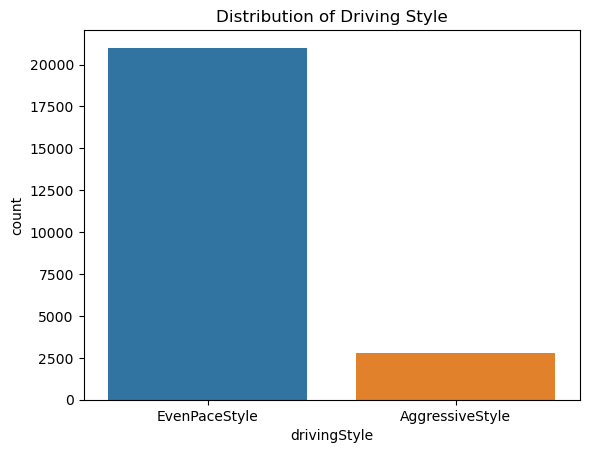

In [8]:
sns.countplot(x='drivingStyle', data=combined_df)
plt.title('Distribution of Driving Style')
plt.show()

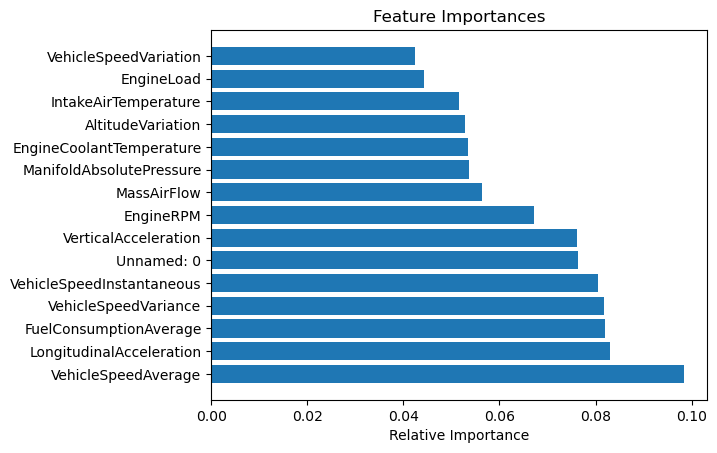

In [9]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2>Support Vector Machine</h2>

In [10]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"Evaluating SVM with {kernel} kernel")
    
    # Initialize the SVM model with balanced class weights and the current kernel
    svm_model = SVC(kernel=kernel, class_weight='balanced')
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_svm = svm_model.predict(X_test)
    
    # Classification report
    print(classification_report(y_test, y_pred_svm))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    print(conf_matrix)
    print("---------------------------------------------------------")


Evaluating SVM with linear kernel
                 precision    recall  f1-score   support

AggressiveStyle       0.23      0.75      0.35       536
  EvenPaceStyle       0.96      0.68      0.80      4217

       accuracy                           0.69      4753
      macro avg       0.59      0.72      0.58      4753
   weighted avg       0.87      0.69      0.75      4753

[[ 402  134]
 [1336 2881]]
---------------------------------------------------------
Evaluating SVM with rbf kernel
                 precision    recall  f1-score   support

AggressiveStyle       0.35      0.88      0.50       536
  EvenPaceStyle       0.98      0.79      0.88      4217

       accuracy                           0.80      4753
      macro avg       0.66      0.83      0.69      4753
   weighted avg       0.91      0.80      0.83      4753

[[ 469   67]
 [ 878 3339]]
---------------------------------------------------------
Evaluating SVM with poly kernel
                 precision    recall  f1-sc

<h2>Logistic Regression</h2>

In [11]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]  # Different values for regularization strength
}

# Initialize the Logistic Regression model with balanced class weights
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')

# Setup GridSearchCV to find the best regularization strength
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Find the best C value
print('Best C value:', grid_search_lr.best_params_['C'])

# Initialize the Logistic Regression model using the best C value
best_lr_model = LogisticRegression(max_iter=5000, class_weight='balanced', C=grid_search_lr.best_params_['C'])

# Train the model with the best C value
best_lr_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_lr = best_lr_model.predict(X_test)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)


Best C value: 10
                 precision    recall  f1-score   support

AggressiveStyle       0.23      0.74      0.35       536
  EvenPaceStyle       0.95      0.68      0.80      4217

       accuracy                           0.69      4753
      macro avg       0.59      0.71      0.57      4753
   weighted avg       0.87      0.69      0.75      4753

[[ 395  141]
 [1336 2881]]


<h2>k-Nearest Neighbors </h2>

In [12]:
# Initialize the kNN model
# Note: 'n_neighbors' is a hyperparameter this will be tuned using cross-validation
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)


In [13]:
# Classification report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

                 precision    recall  f1-score   support

AggressiveStyle       0.72      0.52      0.60       536
  EvenPaceStyle       0.94      0.97      0.96      4217

       accuracy                           0.92      4753
      macro avg       0.83      0.75      0.78      4753
   weighted avg       0.92      0.92      0.92      4753

[[ 279  257]
 [ 110 4107]]


<B>GridSearchCV For the best K Nearest Value

In [14]:
# Setting up GridSearchCV to find the best n_neighbors value
param_grid = {'n_neighbors': range(1, 31)}  # Searching through 1 to 30 neighbors
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best n_neighbors value
print('Best n_neighbors:', grid_search.best_params_['n_neighbors'])

# Initialize the kNN model using the best n_neighbors value
knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

# Re-train the model on the entire training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_knn))
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Best n_neighbors: 1
                 precision    recall  f1-score   support

AggressiveStyle       0.75      0.67      0.71       536
  EvenPaceStyle       0.96      0.97      0.97      4217

       accuracy                           0.94      4753
      macro avg       0.85      0.82      0.84      4753
   weighted avg       0.94      0.94      0.94      4753



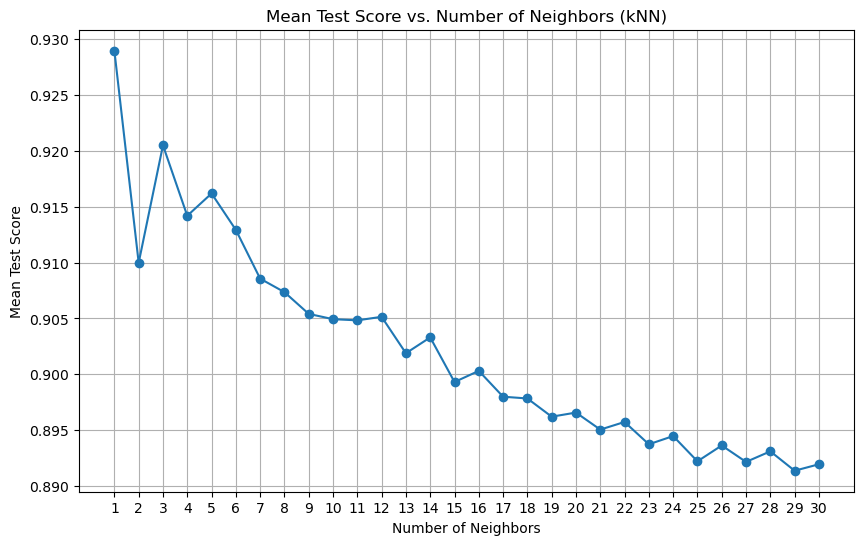

In [15]:
n_neighbors_values = [params['n_neighbors'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plotting the mean test scores for different values of n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Score vs. Number of Neighbors (kNN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.xticks(n_neighbors_values)
plt.grid(True)
plt.show()

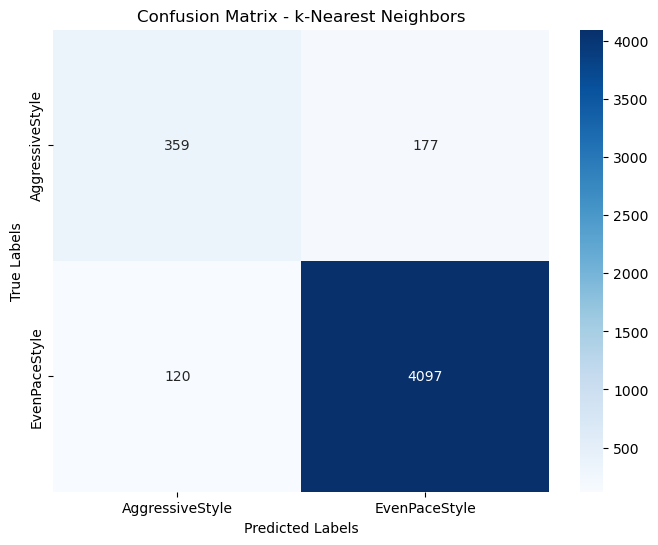

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()

<h2>Result Comparison</h2>

| Metric         | SVM (Best Kernel) | Logistic Regression (Best C) | kNN (Best n_neighbors) |
|----------------|-------------------|------------------------------|------------------------|
| Accuracy       | 80%               | 69%                          | 94%                    |
| Precision      | Aggressive: 35%<br>EvenPace: 98% | Aggressive: 23%<br>EvenPace: 95% | Aggressive: 75%<br>EvenPace: 96% |
| Recall         | Aggressive: 88%<br>EvenPace: 79% | Aggressive: 74%<br>EvenPace: 68% | Aggressive: 67%<br>EvenPace: 97% |
| F1-Score       | Aggressive: 0.50<br>EvenPace: 0.88 | Aggressive: 0.35<br>EvenPace: 0.80 | Aggressive: 0.71<br>EvenPace: 0.97 |


## Result Scatter Plot

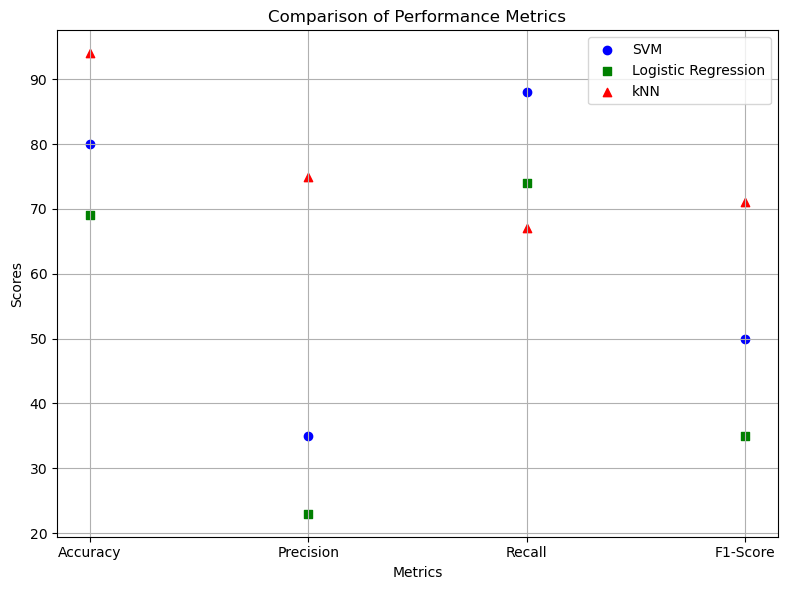

In [17]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [80, 35, 88, 50]
logreg_scores = [69, 23, 74, 35]
knn_scores = [94, 75, 67, 71]

# Scatter plot with different markers
plt.figure(figsize=(8, 6))

# Plot for SVM
plt.scatter(metrics, svm_scores, marker='o', label='SVM', color='blue')

# Plot for Logistic Regression
plt.scatter(metrics, logreg_scores, marker='s', label='Logistic Regression', color='green')

# Plot for kNN
plt.scatter(metrics, knn_scores, marker='^', label='kNN', color='red')

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Result Line Chart

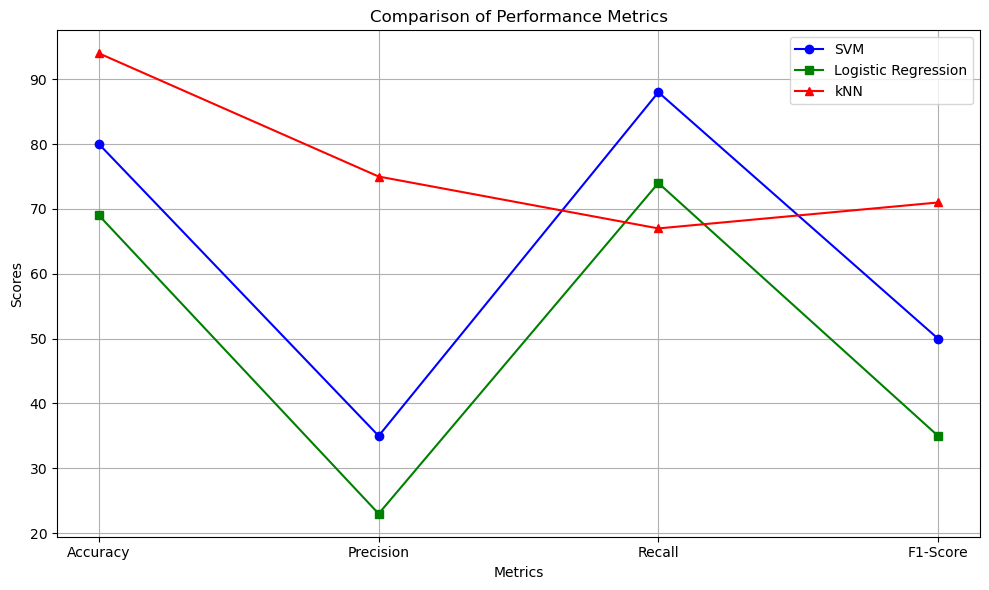

In [18]:
# Create the line chart
plt.figure(figsize=(10, 6))

# Lines for each model
plt.plot(metrics, svm_scores, marker='o', label='SVM', color='blue')
plt.plot(metrics, logreg_scores, marker='s', label='Logistic Regression', color='green')
plt.plot(metrics, knn_scores, marker='^', label='kNN', color='red')

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Performance Metrics')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

##  Result Heatmap 

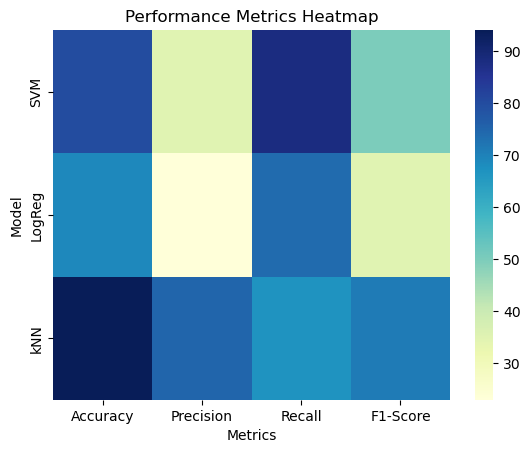

In [19]:
models = ['SVM', 'LogReg', 'kNN']
scores = np.array([svm_scores, logreg_scores, knn_scores])

# Create a heatmap
sns.heatmap(scores, cmap="YlGnBu",
            xticklabels=metrics,
            yticklabels=models)

plt.xlabel('Metrics')
plt.ylabel('Model')
plt.title('Performance Metrics Heatmap')
plt.show()